<a href="https://colab.research.google.com/github/jihansand/StudyCase01-Komputasi-Statistik-SVD-Topic-Modelling/blob/main/Latihan2_Kelompok3_Kompstat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Latihan 2 Kelompok 3 Kompstat

### Nama Anggota
1. Andri Naufal Al'Afif 2106725085
2. Christian Audy Samuel Tampubolon 2106725103
3. Fernaldy 2106706464
4. Jefta Adriel Heryadi 2106638671
5. Jihan Sandrina Halim 2106708160

## Expectation Minimization
A. Akan dilakukan pengelompokan pada data iris dengan kelompok \
a. Petal Length vs Petal Width \
b. Sepal Length vs Sepal Width \

Dilakukan 3 pendekatan yaitu:
1. Pendekatan K-Means Clustering
2. Pendekatan GMM
3. Pendekatan GMM menggunakan EM

B. Prediksi cluster untuk setiap titik data untuk pendekatan K-Means Clustering dan GMM pada ke dua data 2D di atas. Analisalah hasil perbandingan dari K-Means Clustering dan GMM Clustering.

# Import Packages and Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.mixture import GaussianMixture
from sklearn import cluster, datasets
from sklearn.metrics.cluster import adjusted_rand_score

%matplotlib inline

In [ ]:
url = 'https://raw.githubusercontent.com/gianiarda/latihan2/main/Iris.csv'
data = pd.read_csv(url)
data = data.drop('Id', axis=1)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
pl = pd.DataFrame(data["PetalLengthCm"])
pw = pd.DataFrame(data["PetalWidthCm"])
sl = pd.DataFrame(data["SepalLengthCm"])
sw = pd.DataFrame(data["SepalWidthCm"])
gabung = pd.concat([pl,pw], axis=1)
gabung1 = pd.concat([sl,sw], axis=1)

In [ ]:
gabung

,PetalLengthCm,PetalWidthCm
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [ ]:
gabung1

,SepalLengthCm,SepalWidthCm
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [ ]:
for i in range (0,4):
  print (i)

0
1
2
3


# K-Means

## <h1> K-Means n = 2 </h1>

###<h1> PetalLength vs PetalWidth </h1>

<function matplotlib.pyplot.show(*args, **kw)>

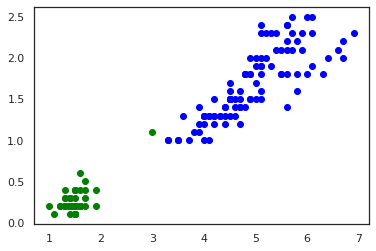

In [ ]:
k_means = KMeans(n_clusters=2)
k_means.fit(gabung)

pred = k_means.predict(gabung)
frame = pd.DataFrame(gabung)
frame2 = pd.DataFrame(gabung)
frame["Cluster"] = pred
frame.columns = ["PetalLengthCm", "PetalWidthCm", "Cluster"]

color = ["blue", "green"]
for k in range (0,2):
  frame2 = frame[frame["Cluster"]==k]
  plt.scatter(frame2["PetalLengthCm"], frame2["PetalWidthCm"], c = color[k])
plt.show

In [ ]:
silhouette_score = metrics.silhouette_score(gabung, pred)
adj_rand_score = adjusted_rand_score(data["Species"], pred)
print("Nilai Silhouette Score = {}" "\n" "Nilai Adjusted Random Score = {}".format(silhouette_score, adj_rand_score))

Nilai Silhouette Score = 0.7766830777033515
Nilai Adjusted Random Score = 0.5583714437541352


###<h1> SepalLength vs SepalWidth </h1>

<function matplotlib.pyplot.show(*args, **kw)>

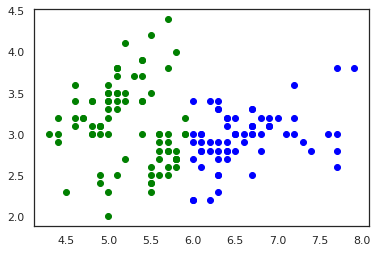

In [ ]:
k_means = KMeans(n_clusters=2)
k_means.fit(gabung1)

pred1 = k_means.predict(gabung1)
frame = pd.DataFrame(gabung1)
frame2 = pd.DataFrame(gabung1)
frame["Cluster"] = pred1
frame.columns = ["SepalLengthCm", "SepalWidthCm", "Cluster"]

color = ["blue", "green"]
for k in range (0,2):
  frame2 = frame[frame["Cluster"]==k]
  plt.scatter(frame2["SepalLengthCm"], frame2["SepalWidthCm"], c = color[k])
plt.show

In [ ]:
silhouette_score = metrics.silhouette_score(gabung1, pred1)
adj_rand_score = adjusted_rand_score(data["Species"], pred1)
print("Nilai Silhouette Score = {}" "\n" "Nilai Adjusted Random Score = {}".format(silhouette_score, adj_rand_score))

Nilai Silhouette Score = 0.5773566528030759
Nilai Adjusted Random Score = 0.3229782381108277


## <h1> K-Means n = 3 </h1>

###<h1> PetalLength vs PetalWidth </h1>

<function matplotlib.pyplot.show(*args, **kw)>

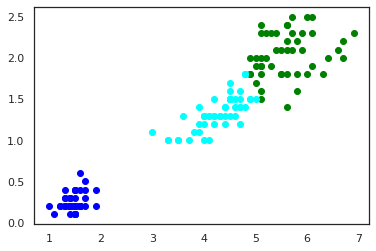

In [ ]:
k_means = KMeans(n_clusters=3)
k_means.fit(gabung)

pred = k_means.predict(gabung)
frame = pd.DataFrame(gabung)
frame2 = pd.DataFrame(gabung)
frame["Cluster"] = pred
frame.columns = ["PetalLengthCm", "PetalWidthCm", "Cluster"]

color = ["blue", "green", "cyan"]
for k in range (0,3):
  frame2 = frame[frame["Cluster"]==k]
  plt.scatter(frame2["PetalLengthCm"], frame2["PetalWidthCm"], c = color[k])
plt.show

In [ ]:
silhouette_score = metrics.silhouette_score(gabung, pred)
adj_rand_score = adjusted_rand_score(data["Species"], pred)
print("Nilai Silhouette Score = {}" "\n" "Nilai Adjusted Random Score = {}".format(silhouette_score, adj_rand_score))

Nilai Silhouette Score = 0.7383539264640935
Nilai Adjusted Random Score = 0.8856970310281228


###<h1> SepalLength vs SepalWidth </h1>

<function matplotlib.pyplot.show(*args, **kw)>

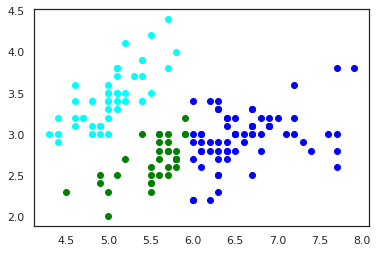

In [ ]:
k_means = KMeans(n_clusters=3)
k_means.fit(gabung1)

pred1 = k_means.predict(gabung1)
frame = pd.DataFrame(gabung1)
frame2 = pd.DataFrame(gabung1)
frame["Cluster"] = pred1
frame.columns = ["SepalLengthCm", "SepalWidthCm", "Cluster"]

color = ["blue", "green", "cyan"]
for k in range (0,3):
  frame2 = frame[frame["Cluster"]==k]
  plt.scatter(frame2["SepalLengthCm"], frame2["SepalWidthCm"], c = color[k])
plt.show

In [ ]:
silhouette_score = metrics.silhouette_score(gabung1, pred1)
adj_rand_score = adjusted_rand_score(data["Species"], pred1)
print("Nilai Silhouette Score = {}" "\n" "Nilai Adjusted Random Score = {}".format(silhouette_score, adj_rand_score))

Nilai Silhouette Score = 0.5897471170340699
Nilai Adjusted Random Score = 0.5581268034230489


## <h1> K-Means n = 4 </h1>

###<h1> PetalLength vs PetalWidth </h1>

<function matplotlib.pyplot.show(*args, **kw)>

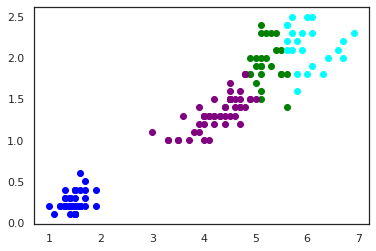

In [ ]:
k_means = KMeans(n_clusters=4)
k_means.fit(gabung)

pred = k_means.predict(gabung)
frame = pd.DataFrame(gabung)
frame2 = pd.DataFrame(gabung)
frame["Cluster"] = pred
frame.columns = ["PetalLengthCm", "PetalWidthCm", "Cluster"]

color = ["blue", "green", "cyan", "purple"]
for k in range (0,4):
  frame2 = frame[frame["Cluster"]==k]
  plt.scatter(frame2["PetalLengthCm"], frame2["PetalWidthCm"], c = color[k])
plt.show

In [ ]:
silhouette_score = metrics.silhouette_score(gabung, pred)
adj_rand_score = adjusted_rand_score(data["Species"], pred)
print("Nilai Silhouette Score = {}" "\n" "Nilai Adjusted Random Score = {}".format(silhouette_score, adj_rand_score))

Nilai Silhouette Score = 0.7690638093010363
Nilai Adjusted Random Score = 0.7789947002248261


###<h1> SepalLength vs SepalWidth </h1>

<function matplotlib.pyplot.show(*args, **kw)>

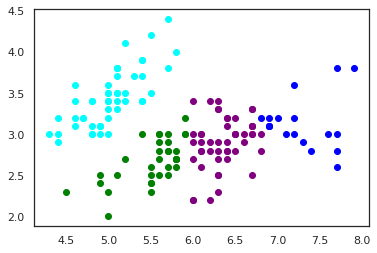

In [ ]:
k_means = KMeans(n_clusters=4)
k_means.fit(gabung1)

pred1 = k_means.predict(gabung1)
frame = pd.DataFrame(gabung1)
frame2 = pd.DataFrame(gabung1)
frame["Cluster"] = pred1
frame.columns = ["SepalLengthCm", "SepalWidthCm", "Cluster"]

color = ["blue", "green", "cyan", "purple"]
for k in range (0,4):
  frame2 = frame[frame["Cluster"]==k]
  plt.scatter(frame2["SepalLengthCm"], frame2["SepalWidthCm"], c = color[k])
plt.show

In [ ]:
silhouette_score = metrics.silhouette_score(gabung1, pred1)
adj_rand_score = adjusted_rand_score(data["Species"], pred1)
print("Nilai Silhouette Score = {}" "\n" "Nilai Adjusted Random Score = {}".format(silhouette_score, adj_rand_score))

Nilai Silhouette Score = 0.6719331014388553
Nilai Adjusted Random Score = 0.5150744167479945


# GMM

## <h1> GMM n = 2 </h1>

###<h1> PetalLength vs PetalWidth </h1>

<function matplotlib.pyplot.show(*args, **kw)>

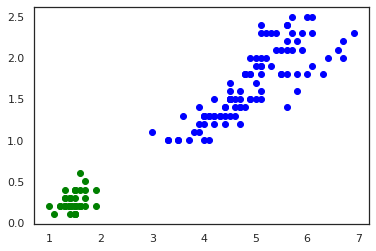

In [ ]:
gmm = GaussianMixture(n_components=2)
gmm.fit(gabung)

#predictions from gmm
labels = gmm.predict(gabung)
frame = pd.DataFrame(gabung)
frame2 = pd.DataFrame(gabung)
frame['Cluster'] = labels
frame.columns = ["PetalLengthCm", "PetalWidthCm", "Cluster"]

color=['blue','green']
for k in range (0,2):
  frame2 = frame[frame["Cluster"]==k]
  plt.scatter(frame2["PetalLengthCm"], frame2["PetalWidthCm"], c = color[k])
plt.show

In [ ]:
adj_rand_score = adjusted_rand_score(data["Species"], labels)
print("Nilai Adjusted Random Score = {}".format(adj_rand_score))

Nilai Adjusted Random Score = 0.5681159420289855


###<h1> SepalLength vs SepalWidth </h1>

     SepalLengthCm  SepalWidthCm  Cluster
0              5.1           3.5        1
1              4.9           3.0        1
2              4.7           3.2        1
3              4.6           3.1        1
4              5.0           3.6        1
..             ...           ...      ...
145            6.7           3.0        0
146            6.3           2.5        0
147            6.5           3.0        0
148            6.2           3.4        0
149            5.9           3.0        0

[150 rows x 3 columns]


<function matplotlib.pyplot.show(*args, **kw)>

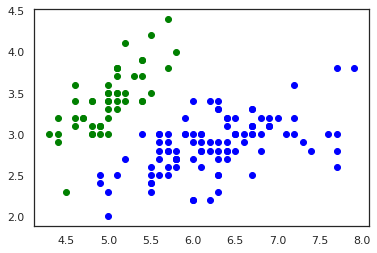

In [ ]:
gmm = GaussianMixture(n_components=2)
gmm.fit(gabung1)

#predictions from gmm
labels1 = gmm.predict(gabung1)
frame = pd.DataFrame(gabung1)
frame2 = pd.DataFrame(gabung1)
frame['Cluster'] = labels
frame.columns = ["SepalLengthCm", "SepalWidthCm", "Cluster"]
print(frame)

color=['blue','green']
for k in range (0,2):
  frame2 = frame[frame["Cluster"]==k]
  plt.scatter(frame2["SepalLengthCm"], frame2["SepalWidthCm"], c = color[k])
plt.show

In [ ]:
adj_rand_score = adjusted_rand_score(data["Species"], labels1)
print("Nilai Adjusted Random Score = {}".format(adj_rand_score))

Nilai Adjusted Random Score = 0.3229782381108277


## <h1> GMM n = 3 </h1>

###<h1> PetalLength vs PetalWidth </h1>

<function matplotlib.pyplot.show(*args, **kw)>

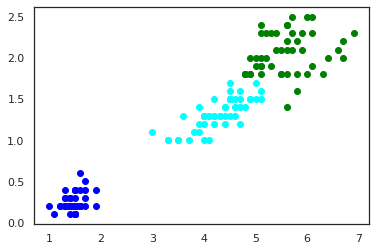

In [ ]:
gmm = GaussianMixture(n_components=3)
gmm.fit(gabung)

#predictions from gmm
labels = gmm.predict(gabung)
frame = pd.DataFrame(gabung)
frame2 = pd.DataFrame(gabung)
frame['Cluster'] = labels
frame.columns = ["PetalLengthCm", "PetalWidthCm", "Cluster"]

color=['blue','green','cyan']
for k in range (0,3):
  frame2 = frame[frame["Cluster"]==k]
  plt.scatter(frame2["PetalLengthCm"], frame2["PetalWidthCm"], c = color[k])
plt.show

In [ ]:
adj_rand_score = adjusted_rand_score(data["Species"], labels)
print("Nilai Adjusted Random Score = {}".format(adj_rand_score))

Nilai Adjusted Random Score = 0.9221767019765943


###<h1> SepalLength vs SepalWidth </h1>

<function matplotlib.pyplot.show(*args, **kw)>

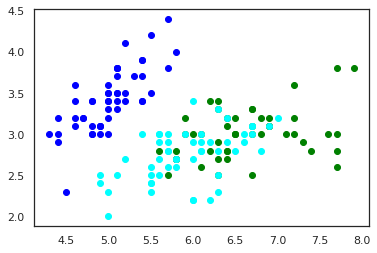

In [ ]:
gmm = GaussianMixture(n_components=3)
gmm.fit(gabung1)

#predictions from gmm
labels1 = gmm.predict(gabung1)
frame = pd.DataFrame(gabung1)
frame2 = pd.DataFrame(gabung1)
frame['Cluster'] = labels
frame.columns = ["SepalLengthCm", "SepalWidthCm", "Cluster"]

color=['blue','green','cyan']
for k in range (0,3):
  frame2 = frame[frame["Cluster"]==k]
  plt.scatter(frame2["SepalLengthCm"], frame2["SepalWidthCm"], c = color[k])
plt.show

In [ ]:
adj_rand_score = adjusted_rand_score(data["Species"], labels1)
print("Nilai Adjusted Random Score = {}".format(adj_rand_score))

Nilai Adjusted Random Score = 0.5678489055578381


## <h1> GMM n = 4 </h1>

###<h1> PetalLength vs PetalWidth </h1>

<function matplotlib.pyplot.show(*args, **kw)>

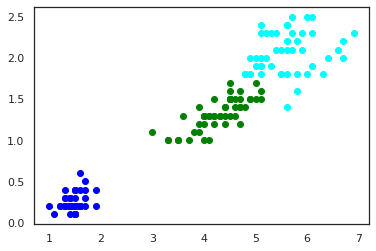

In [ ]:
gmm = GaussianMixture(n_components=3)
gmm.fit(gabung)

#predictions from gmm
labels = gmm.predict(gabung)
frame = pd.DataFrame(gabung)
frame2 = pd.DataFrame(gabung)
frame['Cluster'] = labels
frame.columns = ["PetalLengthCm", "PetalWidthCm", "Cluster"]

color=['blue','green','cyan', 'purple']
for k in range (0,4):
  frame2 = frame[frame["Cluster"]==k]
  plt.scatter(frame2["PetalLengthCm"], frame2["PetalWidthCm"], c = color[k])
plt.show

In [ ]:
adj_rand_score = adjusted_rand_score(data["Species"], labels)
print("Nilai Adjusted Random Score = {}".format(adj_rand_score))

Nilai Adjusted Random Score = 0.9221767019765943


###<h1> SepalLength vs SepalWidth </h1>

<function matplotlib.pyplot.show(*args, **kw)>

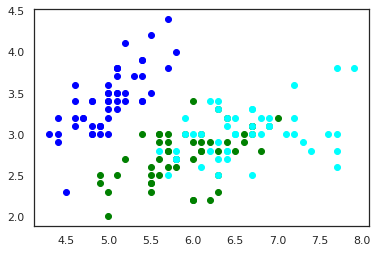

In [ ]:
gmm = GaussianMixture(n_components=3)
gmm.fit(gabung1)

#predictions from gmm
labels1 = gmm.predict(gabung1)
frame = pd.DataFrame(gabung1)
frame2 = pd.DataFrame(gabung1)
frame['Cluster'] = labels
frame.columns = ["SepalLengthCm", "SepalWidthCm", "Cluster"]

color=['blue','green','cyan']
for k in range (0,3):
  frame2 = frame[frame["Cluster"]==k]
  plt.scatter(frame2["SepalLengthCm"], frame2["SepalWidthCm"], c = color[k])
plt.show

In [ ]:
adj_rand_score = adjusted_rand_score(data["Species"], labels1)
print("Nilai Adjusted Random Score = {}".format(adj_rand_score))

Nilai Adjusted Random Score = 0.9221767019765943


# GMM dengan EM

In [ ]:
iris = datasets.load_iris()

In [ ]:
#helper function to visualise covariance structure of fitted Gaussian components
from matplotlib.patches import Ellipse
def plot_cov_ellipse(cov, pos, col='b', nstd=2, ax=None, **kwargs):
    def eigsorted(cov):
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        return vals[order], vecs[:,order]
    if ax is None:
        ax = plt.gca()
    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
    # Width and height are "full" widths, not radius
    width, height = 2 * nstd * np.sqrt(vals)
    ellip = Ellipse(xy=pos, width=width, height=height, angle=theta, color=col, alpha=0.2,**kwargs)
    ax.add_artist(ellip)
    return ellip

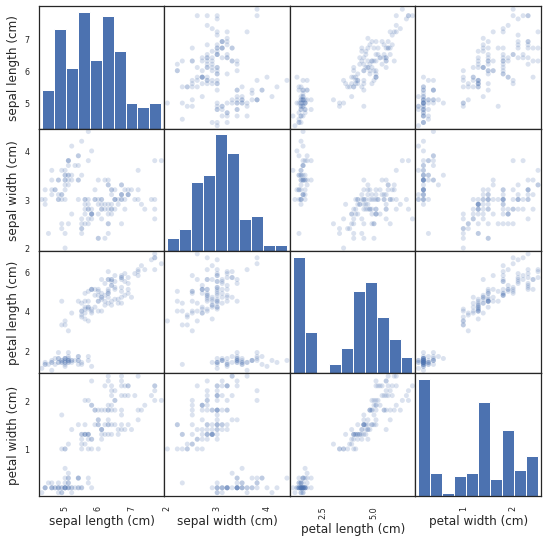

In [ ]:
colors = ['navy', 'turquoise', 'darkorange']
markers = ['+','*','x']

#load iris data; pairwise plots
iris = datasets.load_iris()
df=pd.DataFrame(iris.data,columns = iris.feature_names)
axes = pd.plotting.scatter_matrix(df, figsize=(9, 9), s=100, alpha=0.2)
plt.show()

In [ ]:
df[0:2]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [ ]:
# Try GMMs using different types of covariances in 2d: petal length vs petal width
estimators = dict((cov_type, GaussianMixture(n_components=3,
                   covariance_type=cov_type, max_iter=20, random_state=0))
                  for cov_type in ['spherical', 'diag', 'tied', 'full'])
for (name,estimator) in estimators.items():
    estimator.fit(iris.data[:,2:4]) ## fits a mixture model using EM

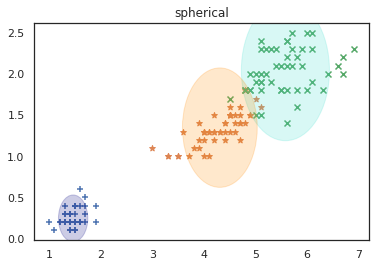

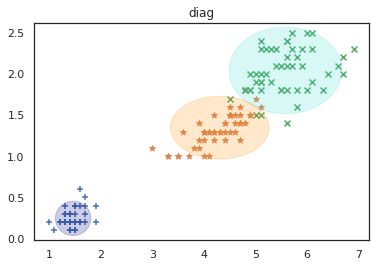

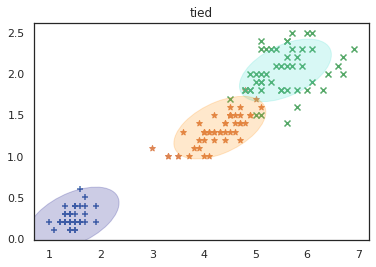

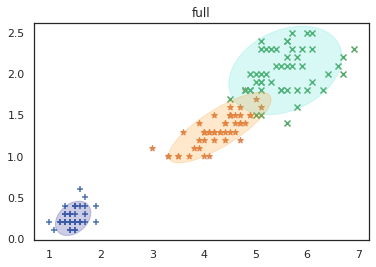

In [ ]:
for (name,gmm) in estimators.items():
    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(data[:, 2], data[:, 3], marker=markers[n])
        if gmm.covariance_type == 'full':
            cov = gmm.covariances_[n]
        elif gmm.covariance_type == 'tied':
            cov = gmm.covariances_
        elif gmm.covariance_type == 'diag':
            cov = np.diag(gmm.covariances_[n])
        elif gmm.covariance_type == 'spherical':
            cov = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        #print(cov)
        pos = estimator.means_[n]
        #print(pos)
        plot_cov_ellipse(cov,pos,col=color)
    plt.title(name)
    plt.show()

In [ ]:
# Try GMMs using different types of covariances in 2d: sepal length vs sepal width
estimators = dict((cov_type, GaussianMixture(n_components=3,
                   covariance_type=cov_type, max_iter=20, random_state=0))
                  for cov_type in ['spherical', 'diag', 'tied', 'full'])
for (name,estimator) in estimators.items():
    estimator.fit(iris.data[:,0:2]) ## fits a mixture model using EM

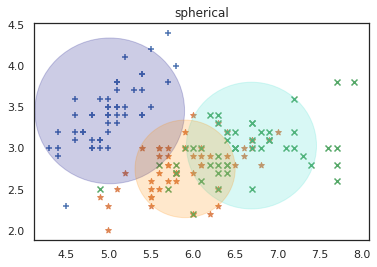

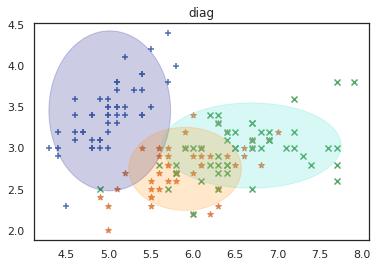

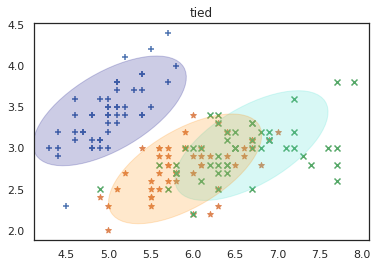

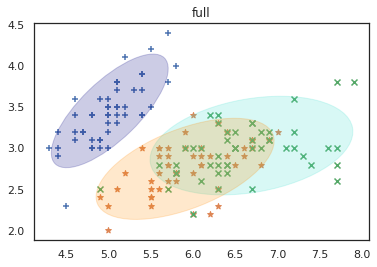

In [ ]:
for (name,gmm) in estimators.items():
    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(data[:, 0], data[:, 1], marker=markers[n])
        if gmm.covariance_type == 'full':
            cov = gmm.covariances_[n]
        elif gmm.covariance_type == 'tied':
            cov = gmm.covariances_
        elif gmm.covariance_type == 'diag':
            cov = np.diag(gmm.covariances_[n])
        elif gmm.covariance_type == 'spherical':
            cov = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        #print(cov)
        pos = estimator.means_[n]
        #print(pos)
        plot_cov_ellipse(cov,pos,col=color)
    plt.title(name)
    plt.show()

## **Kesimpulan**

K-Means clustering cocok untuk data yang berbentuk lingkaran. Radiusnya ditentukan oleh data terjauh dari pusat cluster. Proses komputasinya juga cepat.

Gaussian Mixture Model (GMM) Clustering biasanya digunakan pada data yang berbentuk oval. Jika jumlah datanya besar, GMM membutuhkan proses komputasi yang lebih lama.

K-Means bisa memberikan informasi tiap data masuk ke cluster apa, namun tidak bisa memberi probabilitas benarnya data masuk ke dalam suatu cluster. Sedangkan GMM bisa memberi probabilitas benarnya data masuk ke cluster tersebut.

Untuk mengukur ketepatan clustering, kita menggunakan Adjusted Rand Score. Pada perhitungan dengan Rand Score pada n berbeda untuk metode K-Means dan GMM, dihasilkan:


*   K-Means
    1.   Dengan n = 2, untuk petal menghasilkan score 0.5583714437541352 dan untuk sepal menghasilkan score 0.3229782381108277
    2.   Dengan n = 3, untuk petal menghasilkan score 0.8856970310281228 dan untuk sepal menghasilkan score 0.5581268034230489
    3.   Dengan n = 4, untuk petal menghasilkan score 0.7791223681024853 dan untuk sepal menghasilkan score 0.5150744167479945


*   GMM Clustering
    1.   Dengan n = 2, untuk petal menghasilkan score 0.5681159420289855 dan untuk sepal menghasilkan score 0.13547045023110899
    2.   Dengan n = 3, untuk petal menghasilkan score 0.9221767019765943 dan untuk sepal menghasilkan score 0.5678489055578381
    3.   Dengan n = 4, untuk petal menghasilkan score 0.9221767019765943 dan untuk sepal menghasilkan score 0.5473439141421311

dari hasil di atas, jika nilai mendekati +1 menunjukkan bahwa sampel jauh dari cluster tetangga (data dimasukkan ke cluster yang tepat). Nilai 0 menunjukkan bahwa sampel berada pada atau sangat dekat dengan batas keputusan antara dua cluster tetangga. Sedangkan jika terdapat nilai negatif, sampel tersebut mungkin telah ditetapkan ke cluster yang salah.

Oleh karena itu, dapat disimpulkan bahwa untuk masing-masing metode **n (jumlah cluster) yang paling baik adalah 3** karena random score yang dihasilkan mendekati satu.



